In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H = np.array([[1.0, 0.0],
              [0.0, 50.0]])

def cost_func(v):
    return 0.5 * v.T @ H @ v

def grad(v):
    return H @ v

In [3]:
def gradient_descent(theta0, lr, iters):
    path = [theta0.copy()]
    theta = theta0.copy()

    for i in range(iters):
        g = grad(theta)
        theta = theta - lr * g
        path.append(theta.copy())

    return np.array(path)

In [4]:
theta_test = np.array([1.0, 2.0])
g = grad(theta_test)

print("theta:", theta_test)
print("Gradient:", g)


theta: [1. 2.]
Gradient: [  1. 100.]


In [5]:
theta_test = np.array([1.0, 2.0])
lr = 0.05

g = grad(theta_test)
theta_next = theta_test - lr * g

print("theta_start:", theta_test)
print("gradient:", g)
print("theta_next:", theta_next)

theta_start: [1. 2.]
gradient: [  1. 100.]
theta_next: [ 0.95 -3.  ]


In [6]:
def newton_method(theta0, iters):
    path = [theta0.copy()]
    theta = theta0.copy()
    H_inv = np.linalg.inv(H)

    for i in range(iters):
        g = grad(theta)
        theta = theta - H_inv @ g
        path.append(theta.copy())

    return np.array(path)

In [7]:
theta_test = np.array([1.0, 2.0])
newton_path = newton_method(theta_test, iters=1)

print("theta_start:", theta_test)
print("theta_after_newton:", newton_path[-1])

theta_start: [1. 2.]
theta_after_newton: [0. 0.]


In [8]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

Z = 0.5 * (H[0,0]*X**2 + H[1,1]*Y**2)

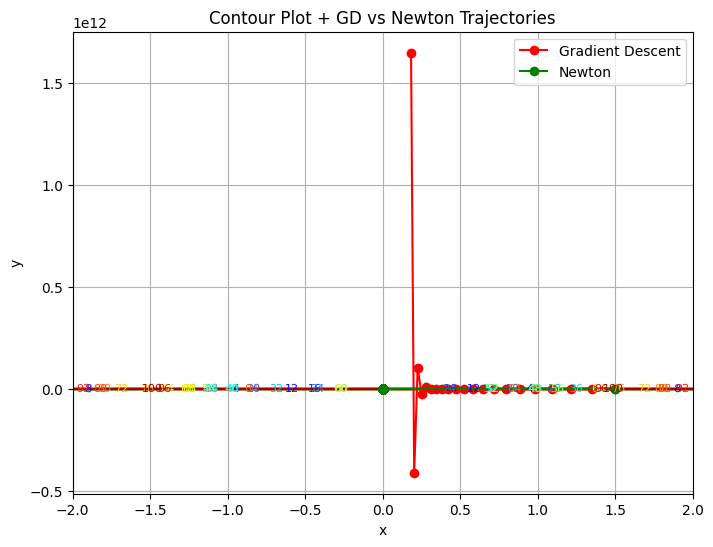

In [9]:
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=30, cmap="jet")
plt.clabel(contours, inline=True, fontsize=8)
theta0 = np.array([1.5, 1.5])

gd_path = gradient_descent(theta0, lr=0.1, iters=20)
newton_path = newton_method(theta0, iters=300)
plt.plot(gd_path[:, 0], gd_path[:, 1], 'o-', color='red', label='Gradient Descent')
plt.plot(newton_path[:, 0], newton_path[:, 1], 'o-', color='green', label='Newton')
plt.title("Contour Plot + GD vs Newton Trajectories")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def conjugate_gradient(theta0, iters):
    path = [theta0.copy()]
    theta = theta0.copy()
    r = -grad(theta)
    p = r.copy()
    
    for i in range(iters):
        alpha = (r.T @ r) / (p.T @ H @ p)
        theta = theta + alpha * p
        r_new = r - alpha * H @ p
        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p
        r = r_new
        path.append(theta.copy())
    
    return np.array(path)

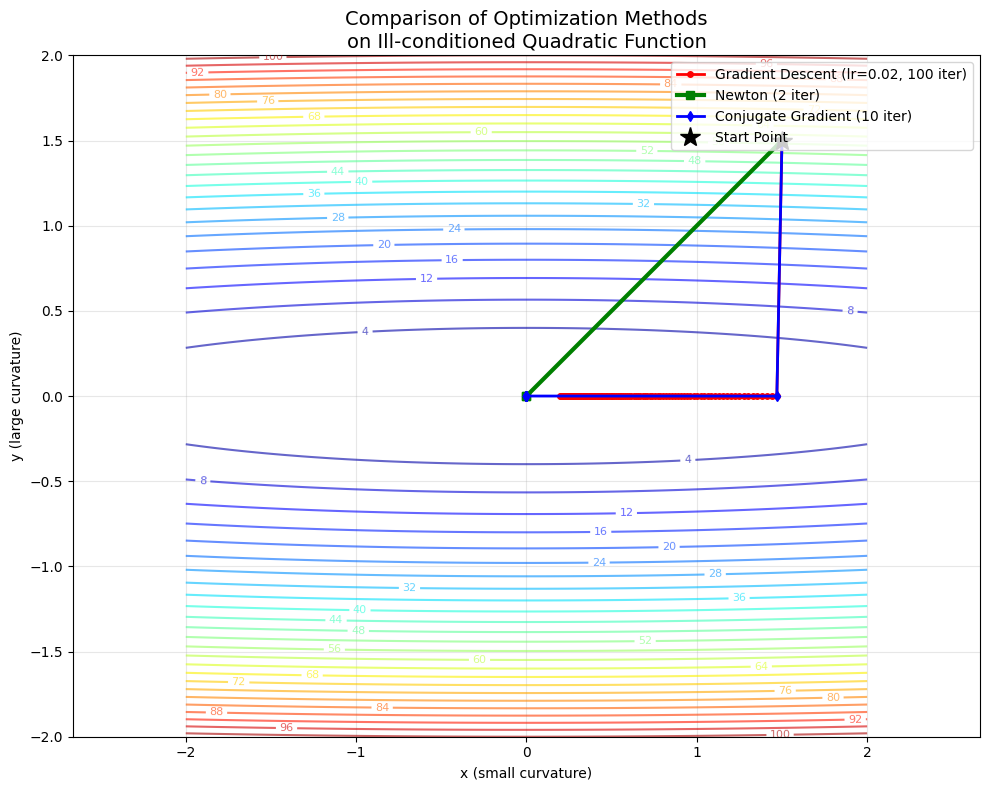

Method Comparison:
Gradient Descent - Final point: [0.19892933 0.        ], Cost: 0.019786
Newton Method    - Final point: [0. 0.], Cost: 0.000000
Conjugate Grad   - Final point: [-1.72723371e-77 -9.77126366e-17], Cost: 0.000000

Optimal point (global minimum): [0, 0], Cost: 0


In [11]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = 0.5 * (H[0,0]*X**2 + H[1,1]*Y**2)

plt.figure(figsize=(10, 8))
contours = plt.contour(X, Y, Z, levels=30, cmap="jet", alpha=0.6)
plt.clabel(contours, inline=True, fontsize=8)
theta0 = np.array([1.5, 1.5])

gd_path = gradient_descent(theta0, lr=0.02, iters=100)
newton_path = newton_method(theta0, iters=2)
cg_path = conjugate_gradient(theta0, iters=10)

plt.plot(gd_path[:, 0], gd_path[:, 1], 'o-', color='red', 
         linewidth=2, markersize=4, label='Gradient Descent (lr=0.02, 100 iter)')
plt.plot(newton_path[:, 0], newton_path[:, 1], 's-', color='green', 
         linewidth=3, markersize=6, label='Newton (2 iter)')
plt.plot(cg_path[:, 0], cg_path[:, 1], 'd-', color='blue', 
         linewidth=2, markersize=5, label='Conjugate Gradient (10 iter)')

plt.plot(theta0[0], theta0[1], 'k*', markersize=15, label='Start Point')

plt.title("Comparison of Optimization Methods\non Ill-conditioned Quadratic Function", fontsize=14)
plt.xlabel("x (small curvature)")
plt.ylabel("y (large curvature)")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Method Comparison:")
print(f"Gradient Descent - Final point: {gd_path[-1]}, Cost: {cost_func(gd_path[-1]):.6f}")
print(f"Newton Method    - Final point: {newton_path[-1]}, Cost: {cost_func(newton_path[-1]):.6f}")
print(f"Conjugate Grad   - Final point: {cg_path[-1]}, Cost: {cost_func(cg_path[-1]):.6f}")
print(f"\nOptimal point (global minimum): [0, 0], Cost: 0")

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dataset Summary:")
print(f"Total samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Malignant (0): {np.sum(y==0)}, Benign (1): {np.sum(y==1)}")

Dataset Summary:
Total samples: 569, Features: 30
Training samples: 455
Test samples: 114
Class distribution: [212 357]
Malignant (0): 212, Benign (1): 357
